# Activity: Explore hypothesis testing

## Introduction

You work for an environmental think tank called Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health. 

They've tasked you with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

ROA is considering the following decisions. For each, construct a hypothesis test and an accompanying visualization, using your results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

For your analysis, you'll default to a 5% level of significance.

## Step 1: Imports

To proceed with your analysis, import `pandas` and `numpy`. To conduct your hypothesis testing, import `stats` from `scipy`.

#### Import Packages

In [1]:
# Import relevant packages
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

import statsmodels.api as sm

import eda_functions as eda

You are also provided with a dataset with national Air Quality Index (AQI) measurements by state over time for this analysis. `Pandas` was used to import the file `c4_epa_air_quality.csv` as a dataframe named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** For purposes of your analysis, you can assume this data is randomly sampled from a larger population.

#### Load Dataset

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
### YOUR CODE HERE ###
aqi = pd.read_csv('/home/gato/Scripts/DS/Statistics/data//c4_epa_air_quality.csv')

## Step 2: Data Exploration

### Before proceeding to your deliverables, explore your datasets.

Use the following space to surface descriptive statistics about your data. In particular, explore whether you believe the research questions you were given are readily answerable with this data.

(None,
 array(['arithmetic_mean', 'aqi'], dtype=object),
             column  kurtosis  skewness  need_transformation
 0  arithmetic_mean  3.961142  1.834874                 True
 1              aqi  9.545950  2.670584                 True)

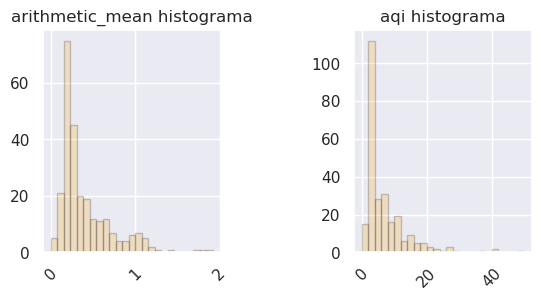

In [3]:
# Explore your dataframe `aqi` here:
### YOUR CODE HERE ###
## Stablishing Normality
#aqi.head() ## ok, seems like categorical and las two numerical float and int 64
#aqi.dtypes ## las point confirmed, 
eda.kurt_skew(aqi, ['arithmetic_mean', 'aqi']) ## Need more information to determinates n.


In [4]:
eda.estadisticas(aqi, 'arithmetic_mean')

,arithmetic_mean
observations,260.000000
minimun,0.000000
maximun,1.921053
mean,0.403169
variance,0.101062
skewness,1.834874
kurtosis,3.961142


In [5]:
eda.estadisticas(aqi, 'aqi')

,aqi
observations,260.000000
minimun,0.000000
maximun,50.000000
mean,6.757692
variance,49.867701
skewness,2.670584
kurtosis,9.545950


In [6]:
#aqi, 'arithmetic_mean'
#aqi, 'aqi'
eda.empirical(aqi, 'arithmetic_mean')

,arithmetic_mean,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.83,0.680,0.150
Frac of the values within +/- 2 SD from the mean,0.95,0.950,0.000
Frac of the values within +/- 3 SD from the mean,0.98,0.997,0.017


In [7]:
eda.empirical(aqi, 'aqi')

,aqi,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.87,0.680,0.190
Frac of the values within +/- 2 SD from the mean,0.96,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.98,0.997,0.017


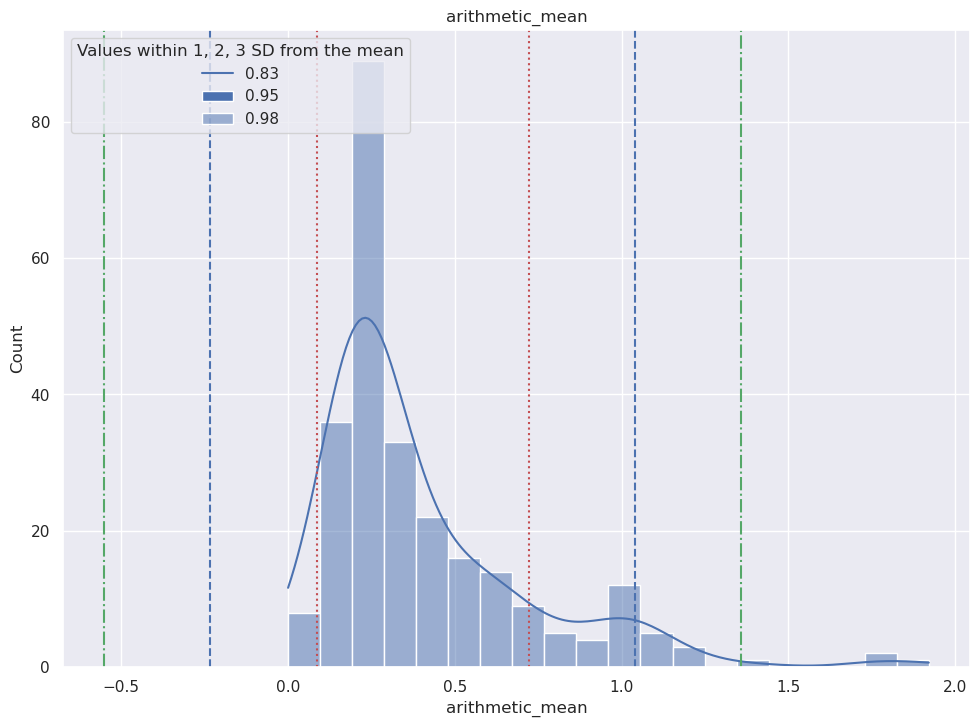

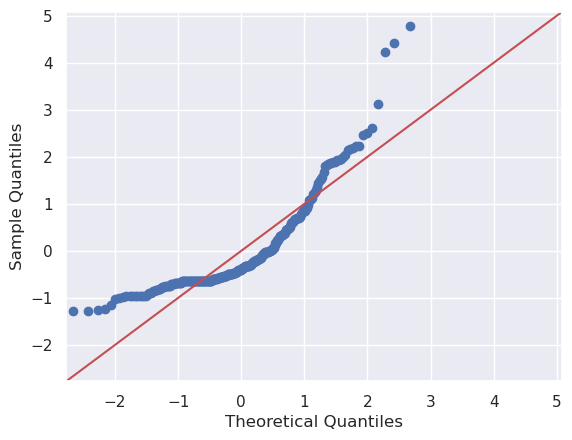

In [8]:
eda.distribution(aqi, 'arithmetic_mean')

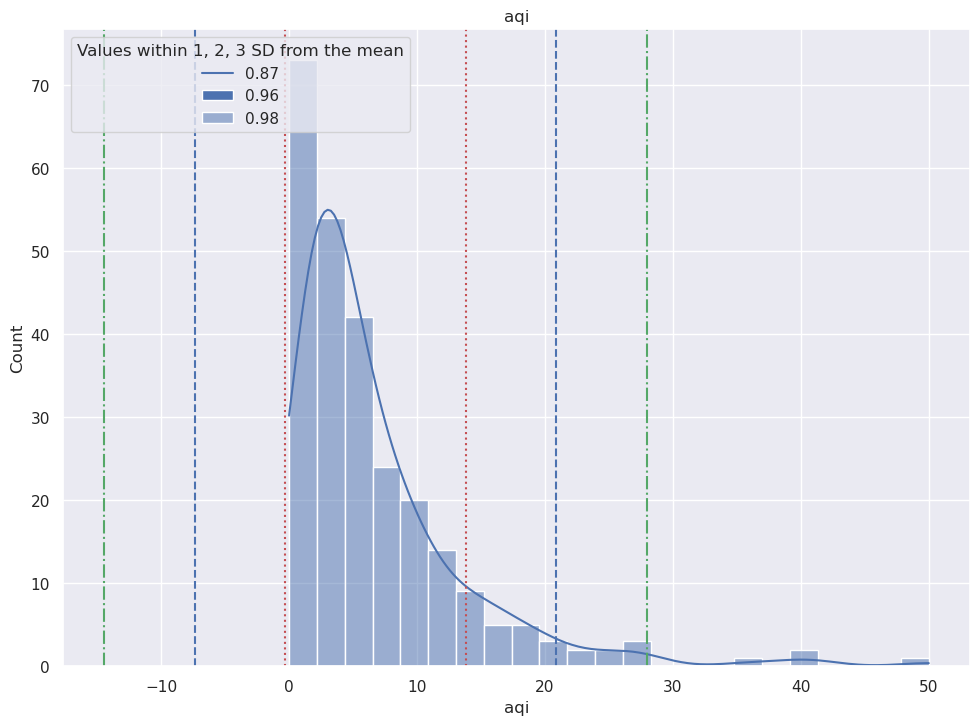

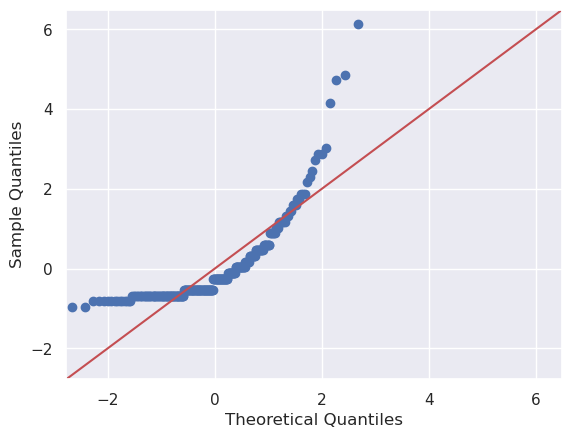

In [9]:
eda.distribution(aqi, 'aqi')

## none of those features are normal.

In [10]:
## lets log the aqi and see how much normal gets
cols = [ 'arithmetic_mean', 'aqi' ]
for col in cols:
    aqi[ 'log_' + col ] = np.log1p(aqi[col])


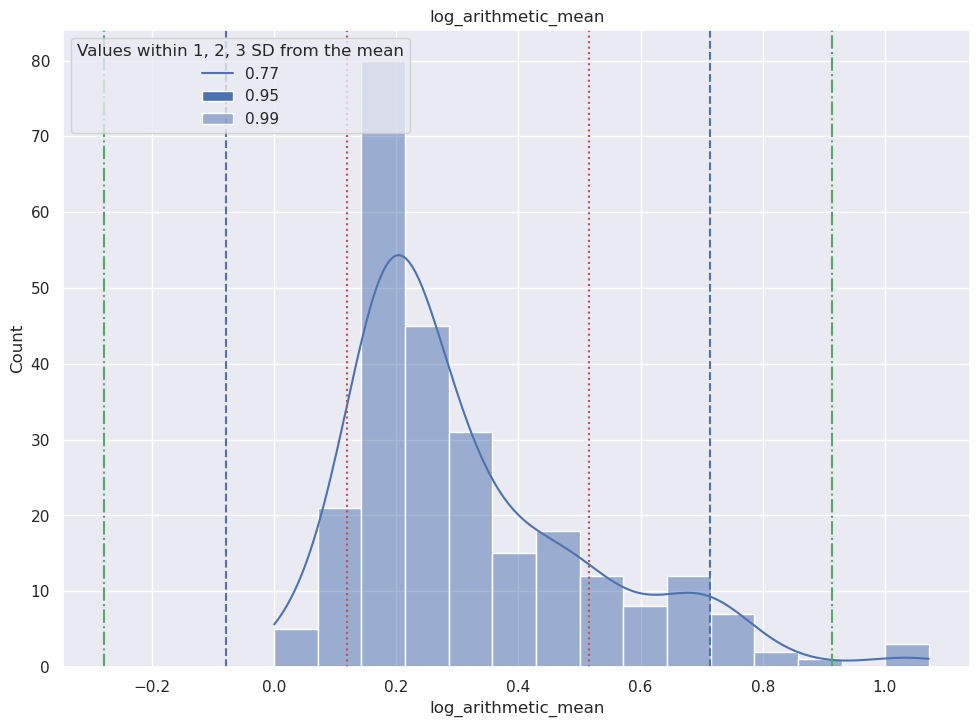

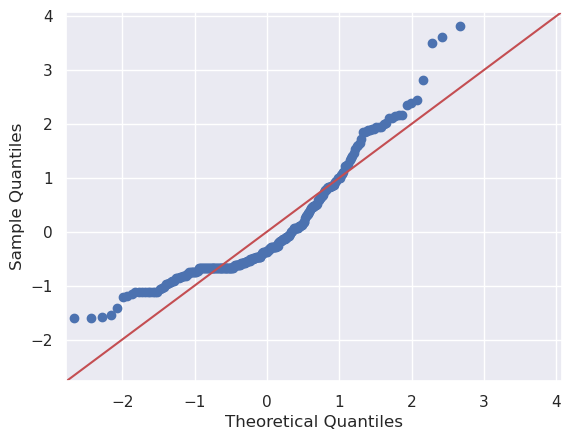

In [11]:
eda.distribution(aqi, 'log_arithmetic_mean')

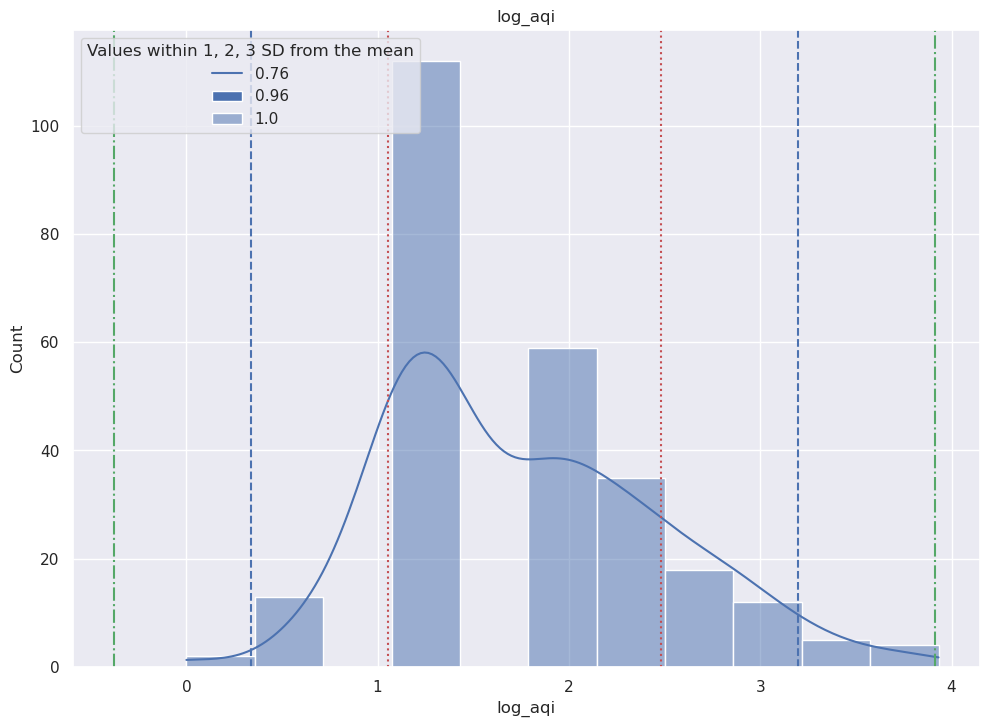

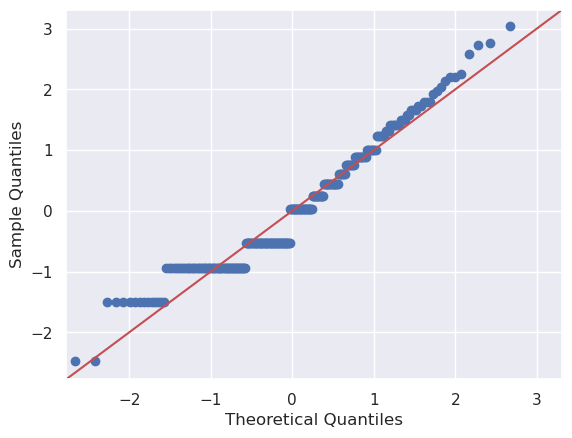

In [12]:
eda.distribution(aqi, 'log_aqi')

                 log_aqi
observations  260.000000
minimun         0.000000
maximun         3.931826
mean            1.766921
variance        0.510818
skewness        0.529729
kurtosis       -0.166265


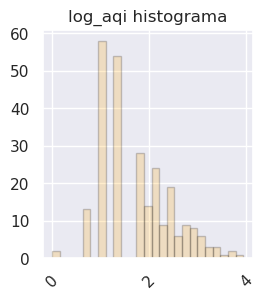

In [13]:
log_cols = [ 'log_aqi' ]
print(eda.estadisticas(aqi, 'log_aqi'))
eda.histogramas(aqi, [ 'log_aqi' ])

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referring to the material on descriptive statisics.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider using `pandas` or `numpy` to explore the `aqi` dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Any of the following functions may be useful:
- `pandas`: `describe()`,`value_counts()`,`shape()`, `head()`
- `numpy`: `unique()`,`mean()`
    
</details>

#### **Question 1: From the preceding data exploration, what do you recognize?**

The aqi is not normally ditributed.
I have normalize the feature using numpy log1p, as they are aqi with value zero.
We drop the exemples that were missing data.



## Step 3. Statistical Tests

Before you proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [14]:
aqi.columns

Index(['Unnamed: 0', 'date_local', 'state_name', 'county_name', 'city_name',
       'local_site_name', 'parameter_name', 'units_of_measure',
       'arithmetic_mean', 'aqi', 'log_arithmetic_mean', 'log_aqi'],
      dtype='object')

In [15]:
# Create dataframes for each sample being compared in your test
### YOUR CODE HERE ###
cali = aqi[aqi['state_name'] == 'California']
la   = aqi[aqi['county_name'] == 'Los Angeles']
rest = cali[cali['county_name'] != 'Los Angeles']


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating two dataframes, one for Los Angeles, and one for all other California observations.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

For your first dataframe, filter to `county_name` of `Los Angeles`. For your second dataframe, filter to `state_name` of `Calfornia` and `county_name` not equal to `Los Angeles`.
    
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


#### Set the significance level:

In [24]:
# For this analysis, the significance level is 5%
### YOUR CODE HERE
#round(5.76543, 2)
mean_la_log   = round(la['log_aqi'].mean(), 3)
mean_rest_log = round(rest['log_aqi'].mean(), 3)
mean_la  = round(la['aqi'].mean(), 3)
mean_rest= round(rest['aqi'].mean(), 3)
means = {}
means['mean_log_la'] = mean_la_log
means['mean_log_rest'] = mean_rest_log
means['mean_la'] = mean_la
means['mean_rest'] = mean_rest
means


{'mean_log_la': 2.739,
 'mean_log_rest': 2.325,
 'mean_la': 16.286,
 'mean_rest': 11.0}

In [31]:
stats.ttest_ind(a=la['log_aqi'], b=rest['log_aqi'], equal_var=False)

Ttest_indResult(statistic=2.6634948777424294, pvalue=0.01340695749474014)

In [30]:
stats.ttest_ind(a=la['aqi'], b=rest['aqi'], equal_var=False)

Ttest_indResult(statistic=2.1107010796372014, pvalue=0.049839056842410995)

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [45]:
# Compute your p-value here

### YOUR CODE HERE ###
stats.ttest_ind(a=la['aqi'], b=rest['aqi'], equal_var=False)

Ttest_indResult(statistic=2.1107010796372014, pvalue=0.049839056842410995)

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a two-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_ind()`, a is the aqi column from our "Los Angeles" dataframe, and b is the aqi column from the "Other California" dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  Be sure to set `equal_var` = False.

</details>

#### **Question 2. What is your P-value for hypothesis 1, and what does this indicate for your null hypothesis?**

[Write your response here. Double-click (or enter) to edit.]

### Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [39]:
# Create dataframes for each sample being compared in your test

### YOUR CODE HERE ###
ny = aqi[aqi['state_name'] == 'New York']
oh = aqi[aqi['state_name'] == 'Ohio']

ny.shape, oh.shape

((10, 12), (12, 12))

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the materials on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating two dataframes, one for New York, and one for Ohio observations.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

For your first dataframe, filter to `state_name` of `New York`. For your second dataframe, filter to `state_name` of `Ohio`.
    
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

### Here, you are comparing the sample means between two independent samples **in one direction**. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [46]:
# Computer your p-value here

### YOUR CODE HERE ###

reg = stats.ttest_ind(a=ny['aqi'], b=oh['aqi'], alternative='less')
log = stats.ttest_ind(a=ny['log_aqi'], b=oh['log_aqi'], alternative='less')

print(f'no log: {reg}')
print(f'log:    {log}')

no log: Ttest_indResult(statistic=-1.891850434703295, pvalue=0.03654034300840755)
log:    Ttest_indResult(statistic=-1.8744425169920569, pvalue=0.03777595153702512)


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a two-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_ind()`, a is the aqi column from the "New York" dataframe, an b is the aqi column from the "Ohio" dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  You can assign `tstat`, `pvalue` to the output of `ttest_ind`. Be sure to include `alternative = less` as part of your code.  

</details>

#### **Question 3. What is your P-value for hypothesis 2, and what does this indicate for your null hypothesis?**


pvalH2 = 0.0365
pvalH2 < 0.05
With a p-value of 0.0365 and being less than 0.05
We reject the null in favor of the alternative hypothesis
therefore, we can conclude at the 5% significance level that New York as a lower
mean AQI than Ohio
 

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [49]:
# Create dataframes for each sample being compared in your test

### YOUR CODE HERE ###
michi = aqi[aqi['state_name'] == 'Michigan']


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating one dataframe which only includes Michigan.
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses here:**

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

## Here, you are comparing one sample mean relative to a particular value in one direction. Therefore, you will utilize a **one-sample  𝑡-test**. 

#### Compute the P-value

In [52]:
# Computer your p-value here

### YOUR CODE HERE ###
tstat, pval = stats.ttest_1samp(michi['aqi'], 10, alternative='greater')
print(tstat)
print(pval)

-1.7395913343286131
0.9399405193140109


In [54]:
0.9399405193140109 - 1

-0.0600594806859891

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a one-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_1samp)`, you are comparing the aqi column from your Michigan data relative to 10, the new policy threshold.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  You can assign `tstat`, `pvalue` to the output of `ttest_1samp`. Be sure to include `alternative = greater` as part of your code.  

</details>

#### **Question 4. What is your P-value for hypothesis 3, and what does this indicate for your null hypothesis?**

In [55]:
## As is a one-sample 𝑡-test
## and the alternative='greater'
## we obtain the pvalue toward the right part
## of the distribution.
## therefore we can substract 1 - the p value
## to compare it with the Significance Level (remains at 5%)
pval - 1

-0.0600594806859891

0.060 > Significance Level (remains at 5%)
therefore we fail to reject the null hypotesis.

## Step 4. Results and Evaluation

Now that you've completed your statistical tests, you can consider your hypotheses and the results you gathered.

#### **Question 5. Did your results show that the AQI in Los Angeles County was statistically different from the rest of California?**

Yes, the results indicated that the AQI in Los Angeles County was in fact different from the rest of California.

#### **Question 6. Did New York or Ohio have a lower AQI?**

Using a 5% significance level, you can conclude that New York has a lower AQI than Ohio based on the results.

#### **Question 7: Will Michigan be affected by the new policy impacting states with a mean AQI of 10 or greater?**



Based on the tests, you would fail to reject the null hypothesis, meaning you can't conclude that the mean AQI is greater than 10. Thus, it is unlikely that Michigan would be affected by the new policy.



# Conclusion

**What are key takeaways from this lab?**

Even with small sample sizes, the variation within the data is enough to allow you to make statistically significant conclusions. You identified at the 5% significance level that the Los Angeles mean AQI was stastitically different from the rest of California, and that New York does have a lower mean AQI than Ohio. However, you were unable to conclude at the 5% significance level that Michigan's mean AQI was greater than 10.

**What would you consider presenting to your manager as part of your findings?**

For each test, you would present the null and alternative hypothesis, then describe your conclusion and the resulting p-value that drove that conclusion. As the setup of t-test's have a few key configurations that dictate how you interpret the result, you would specify the type of test you chose, whether that tail was one-tail or two-tailed, and how you performed the t-test from `stats`.


**What would you convey to external stakeholders?**

In answer to the research questions posed, you would convey the level of significance (5%) and your conclusion. Additionally, providing the sample statistics being compared in each case will likely provide important context for stakeholders to quickly understand the difference between your results.
